In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [10]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [11]:
# Display first few rows
display(df.head())

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [14]:
# Encode categorical variables if any (e.g., Gender column)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
# Selecting features and target variable (assuming 'Purchased' is the target variable)
X = df.iloc[:, :-1]  # Features (adjust as needed)
y = df.iloc[:, -1]   # Target variable

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Making predictions
y_pred = model.predict(X_test)

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

In [21]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [22]:
# Print metrics
print(f'Confusion Matrix:\n{cm}')
print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Error Rate: {error_rate:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Confusion Matrix:
[[50  2]
 [ 7 21]]
True Positives (TP): 21
True Negatives (TN): 50
False Positives (FP): 2
False Negatives (FN): 7
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.91
Recall: 0.75


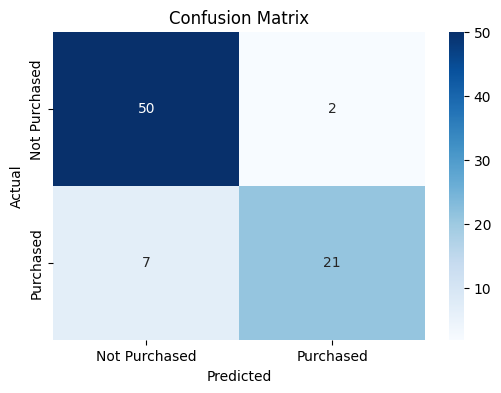

In [23]:
# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

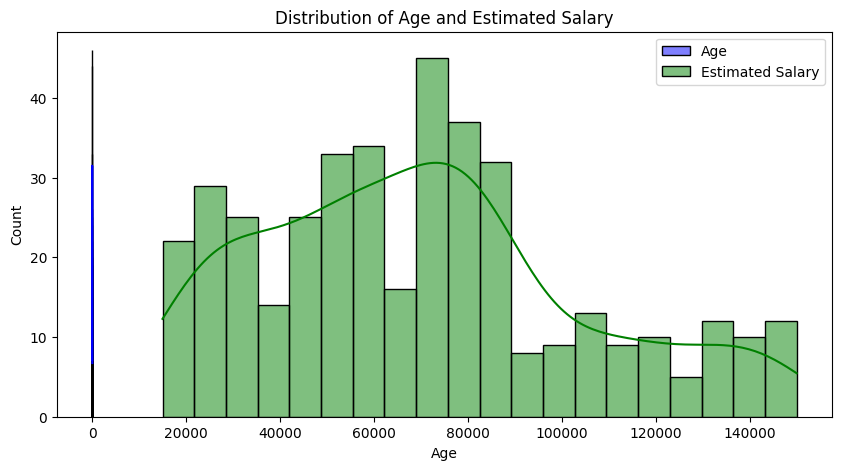

In [24]:
# Additional data visualizations
# Distribution of age and estimated salary
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue', label='Age')
sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='green', label='Estimated Salary')
plt.legend()
plt.title('Distribution of Age and Estimated Salary')
plt.show()

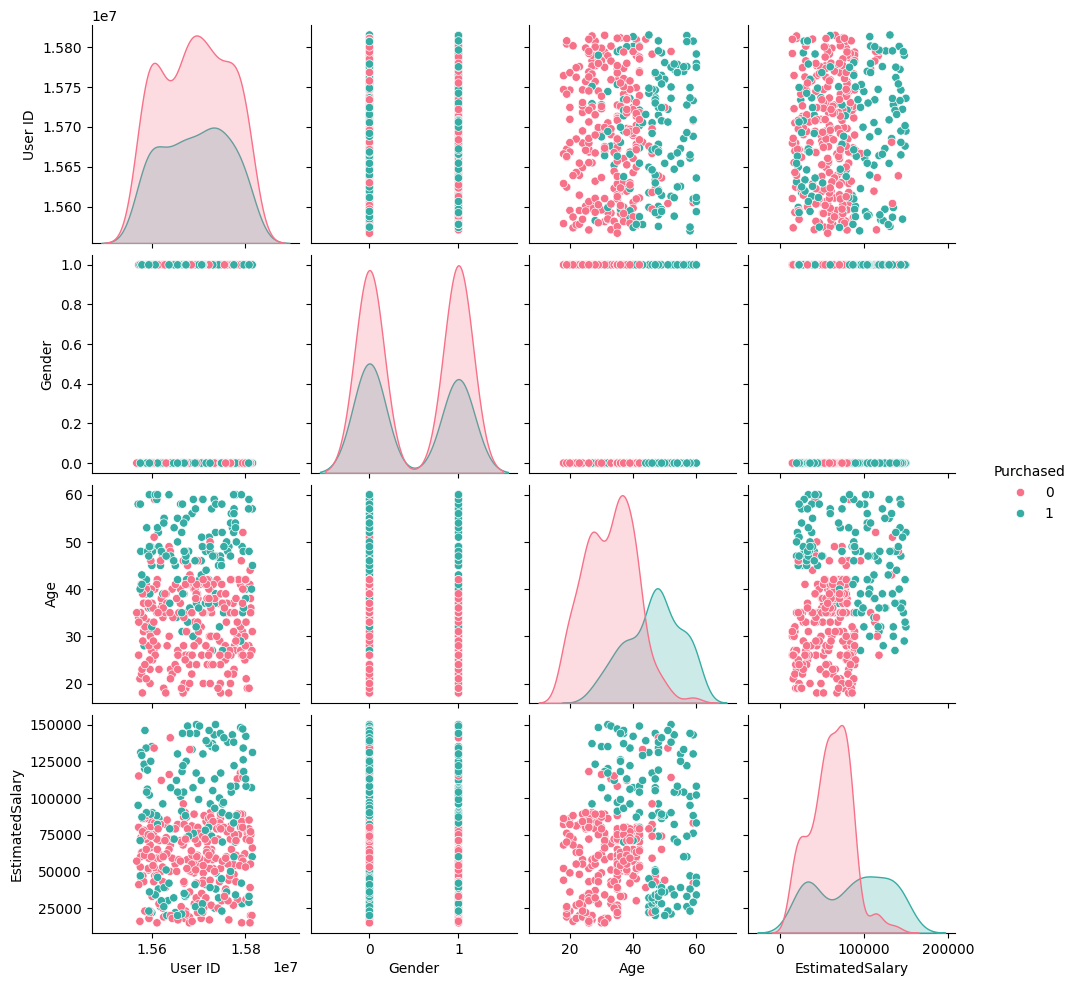

In [25]:
# Pairplot to show relationships between features and target
sns.pairplot(df, hue='Purchased', palette='husl')
plt.show()

C:\Users\anmol\AppData\Local\Temp\ipykernel_30524\4158343588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette='pastel')


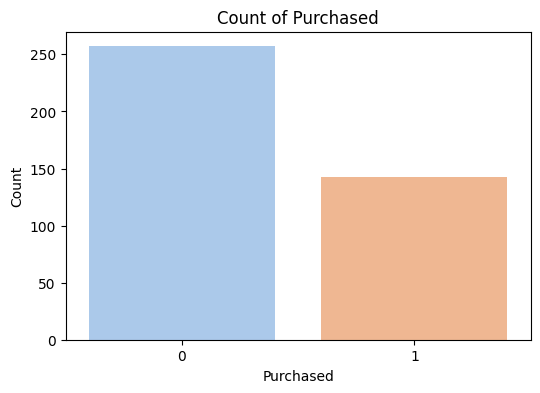

In [26]:
# Countplot of Purchased variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df, palette='pastel')
plt.title('Count of Purchased')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()